In [ ]:
'''

Mini Batch Gradient Descent: Parameters are updated after computing the gradient of error with respect to a subset( n Samples)
                             of the training set.
                                                         
'''

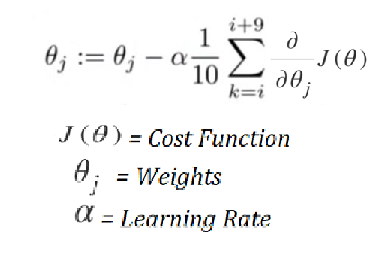

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

x = [30, 35, 37, 59, 70, 76, 88, 100 ]
y = [1100, 1423, 1377, 1800, 2304, 2588, 3495, 4839]

x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

n = len(y)
learningrate = 0.1

In [10]:
print("In Mini Batch Gradient Descent Weights are updating after considering N samples from dataset for finding  \nprediction and cost value generation")

batch=4

print("\nBatch Size:",batch)

theta0 = 0
theta1 = 0

loss = []
iteration = []

for step in range(1,100):
    
    # Shuffle data
    seed = np.random.random()
    np.random.seed(int(seed))
    np.random.shuffle(x)
    np.random.seed(int(seed))
    np.random.shuffle(y)
    
    # Get the Data Based on Batch
    x_new = x[0:batch]
    y_new = y[0:batch]
    
    if(step %25 ==0):
        print("Epoch:",step)
    
        print("Number of Samples:",len(x_new))
    
        print("\ttheta0:{0} \n\ttheta1:{1}".format(theta0,theta1))

    # Compute Loss Function
    n = len(y_new)

    predicted = theta0 + (theta1 * x_new)

    cost =(1/n)*np.sum(np.square(y_new - predicted))
    
    if(step %25 ==0):
        print("\tLoss :",cost)
    
    loss.append(cost)
    iteration.append(step)

    dtheta0 = (-(2/n) * np.sum(np.subtract(y_new,predicted)))
    dtheta1 = (-(2/n) * np.sum(np.multiply(np.subtract(y_new,predicted),x_new)))

    theta0 = theta0 - (learningrate * dtheta0)
    theta1 = theta1 - (learningrate * dtheta1)

In Mini Batch Gradient Descent Weights are updating after considering N samples from dataset for finding  
prediction and cost value generation

Batch Size: 4
Epoch: 25
Number of Samples: 4
	theta0:1481.9717698681752 
	theta1:1628.6420161369965
	Loss : 882531.8323176987
Epoch: 50
Number of Samples: 4
	theta0:1378.832540542995 
	theta1:2262.973002844162
	Loss : 69620.58919368248
Epoch: 75
Number of Samples: 4
	theta0:1207.951075279338 
	theta1:2555.467506403488
	Loss : 59487.474274440654


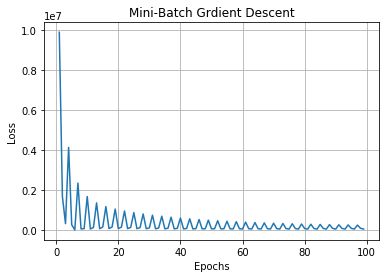

In [11]:
plt.plot(iteration,loss)
plt.title("Mini-Batch Grdient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()